# VIS_Hospital

# Visualización y conclusiones del modelo predictivo

Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, auc

Importación del dataset final

In [4]:
Hospital = pd.read_csv(r'Hospital_MOD.csv')
HospitalOk = Hospital.copy() #Copia como respaldo de comparación ante posibles cambios

Separamos el dataset en X e y, quitando del conjunto X las variables referidas a complicaciones.
Indicaremos, como se dijo, COMPLICACION POST BIOPSIA como variable objetivo, en lugar de HOSPITALIZACION

Luego separamos en conjuntos de entrenamiento y prueba

In [5]:
X = HospitalOk.drop(columns=[
'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION'])
y = HospitalOk['COMPLICACION POST BIOPSIA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Predictivo: Árbol de Decisión

Luego del riguroso análisis realizado en MOD_Hospital.ipynb, afirmamos que el mejor modelo a utilizar es un árbol de decisión con una profundidad de 14 niveles

# Instancia, entrenamiento y predicción

In [6]:
modelo_arbol = DecisionTreeClassifier(max_depth=14, criterion='gini', random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=42)

In [7]:
y_test_pred = modelo_arbol.predict(X_test)

# Evaluación y observación del comportamiento del modelo

Métricas Exactitud, Precisión, Sensibilidad, F1_score (informe de clasificación)

In [8]:
print('Exactitud:', accuracy_score(y_test, y_test_pred)) #(verdaderos_positivos + verdaderos_negativos) / total_predicciones)
print('*************************************************')
print('Precisión:', precision_score(y_test, y_test_pred)) #verdaderos_positivos/(verdaderos_positivos + falsos_positivos)
print(f'El {int(precision_score(y_test, y_test_pred)*100)}% de las preedicciones positivas fueron correctas')
print('*************************************************')
print('Sensibilidad:', recall_score(y_test, y_test_pred)) #verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
print(f'El {recall_score(y_test, y_test_pred)*100}% de los casos positivos fueron detectados')
print('*************************************************')
print('F1_score:', f1_score(y_test, y_test_pred))
print('***********************  informe de clasificación conjunto PRUEBA  **********************')
print(classification_report(y_test, y_test_pred))
print('*****************************************************************************************')

Exactitud: 1.0
*************************************************
Precisión: 1.0
El 100% de las preedicciones positivas fueron correctas
*************************************************
Sensibilidad: 1.0
El 100.0% de los casos positivos fueron detectados
*************************************************
F1_score: 1.0
***********************  informe de clasificación conjunto PRUEBA  **********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       107

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217

*****************************************************************************************


Matriz de Confusión y Mapa de Calor

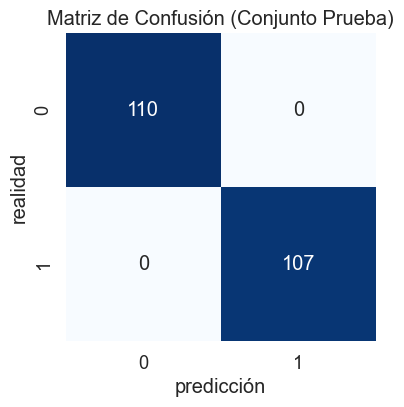

In [9]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicción')
plt.ylabel('realidad')
plt.title('Matriz de Confusión (Conjunto Prueba)')
plt.show()

Incidencia de las variables del conjunto X en la predicción de la variable objetivo

[0.31895123 0.         0.         0.46955596 0.02330541 0.00891596
 0.10336954 0.         0.00708007 0.06882183]


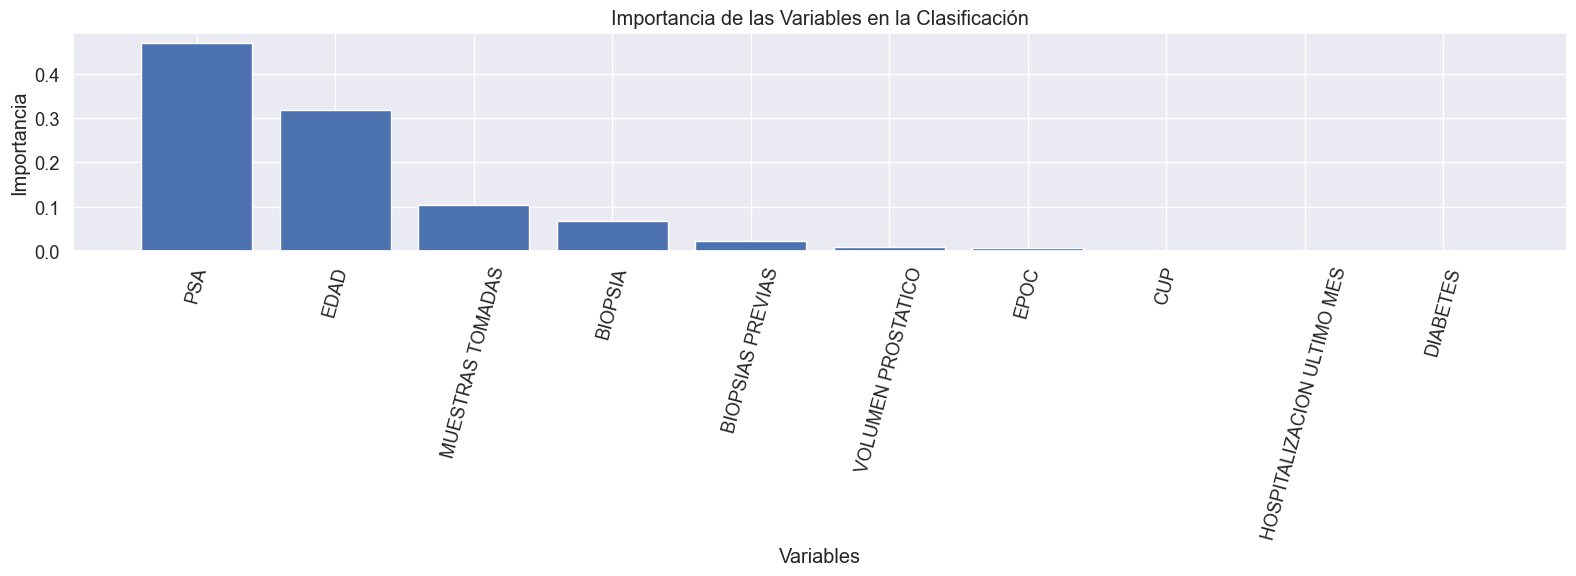

In [10]:
importances = modelo_arbol.feature_importances_     # Obtenemos la importancia de las variables
nombres_variables = X.columns                       # Obtenemos los nombres de las variables
indices = np.argsort(importances)[::-1]             # Ordenamos las variables por su importancia
print(modelo_arbol.feature_importances_)

plt.figure(figsize=(16, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [nombres_variables[i] for i in indices], rotation=75)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables en la Clasificación')
plt.tight_layout()
plt.show()

Gráfica del Árbol de Decisión

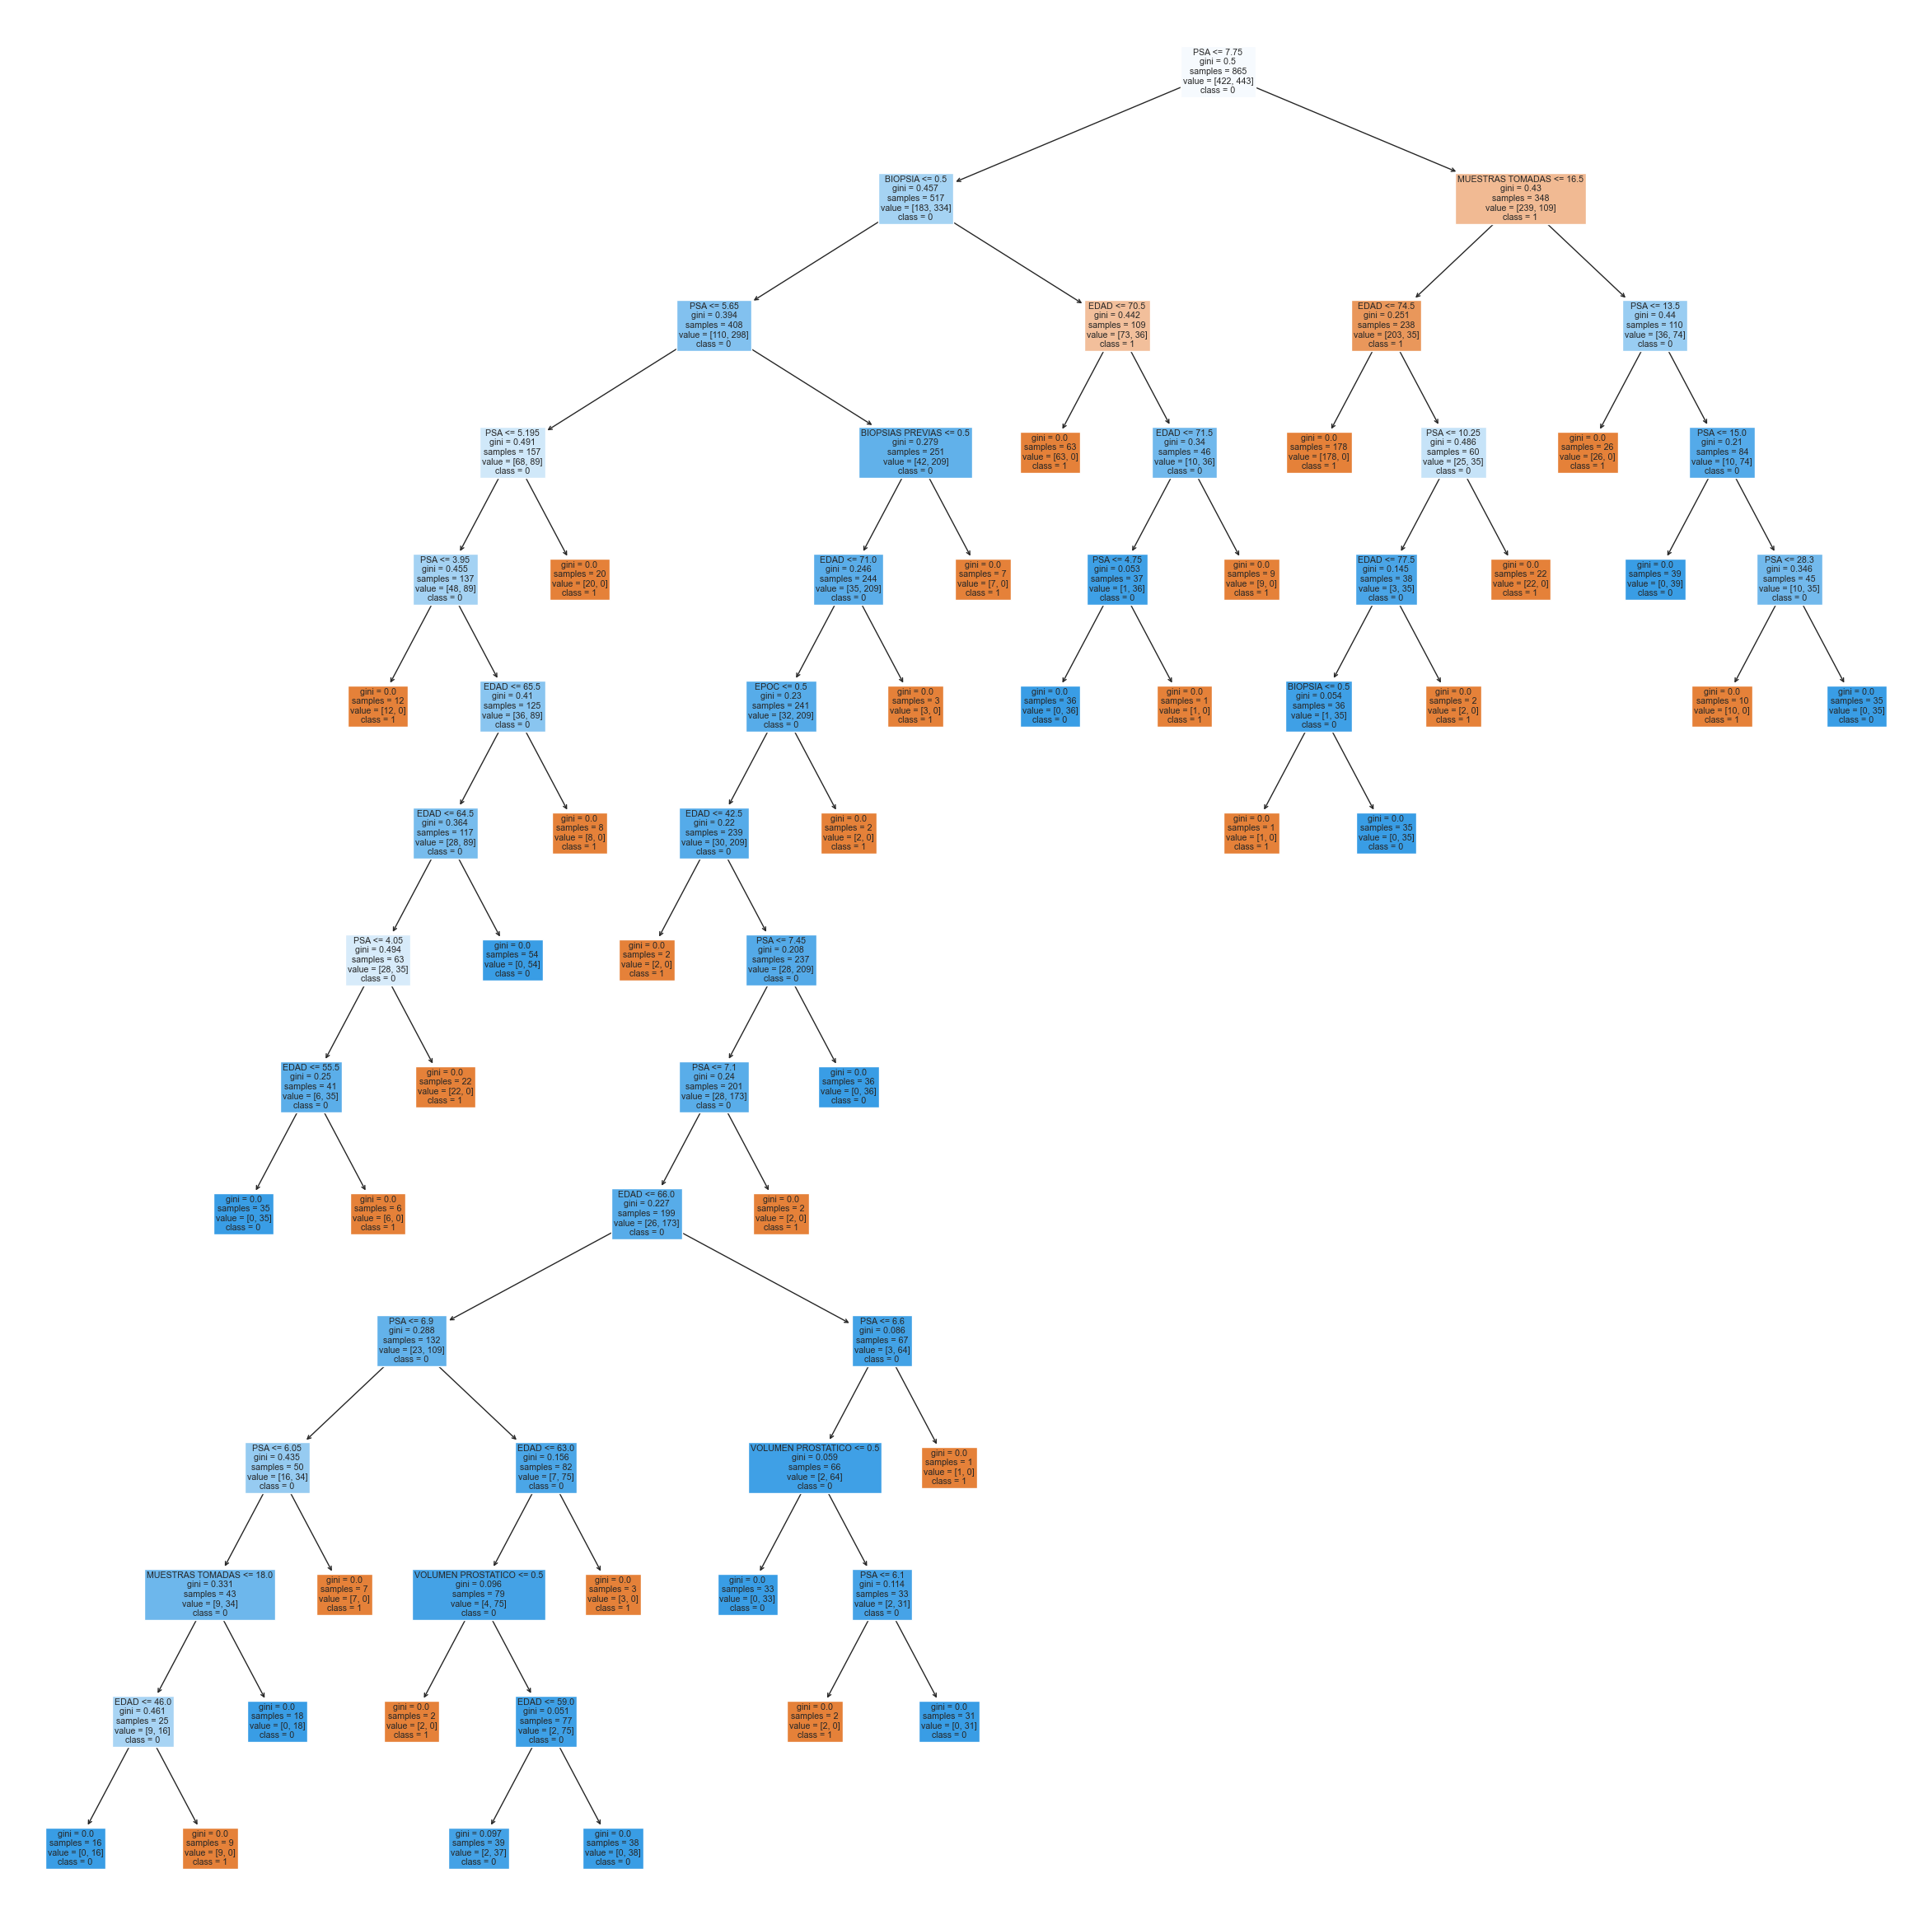

In [11]:
plt.figure(figsize=(30, 30))
plot_tree(modelo_arbol, feature_names=X.columns.tolist(), class_names=['1','0'], filled=True)
plt.show()

# Conclusiones Finales

De acuerdo a lo observado en el modelo predictivo, podemos afirmar que las tres características que más influyen en la presentación o no de complicaciones infecciosas luego de un procedimiento de biopsia prostática son **el valor de PSA, la EDAD, y la cantidad de MUESTRAS TOMADAS**, siendo determinantes en estas proporciones:

- PSA: 46,9% (Los pacientes con PSA más alto son más propensos a complicaciones infecciosas post biopsia)
- EDAD: 31,8% (Los pacientes de mayor EDAD son más propensos a complicaciones infecciosas post biopsia)
- MUESTRAS TOMADAS: 10,3% (Los pacientes a quienes se le tomaron más muestras son más propensos a complicaciones infecciosas post biopsia).

Luego, el paciente que haya tenido detección de enfermedad en la biopsia tendrá más propensión a complicaciones infecciosas post biopsia; esta variable incide en tan solo un 6,8%.

Las variables como existencia de biopsias previas incide en 2,3%; volumen porstático y EPOC tienen una incidencia en la variable objetivo menor al 1%

Las demás variables (cup, hospitalización en el último mes, diabetes) tienen incidencia 0.

NOTA: Estamos en condiciones de dearrollar un modelo interactivo que permite cargar las características de pacientes ficticios y obtener una predicción del 99,9% sobre la posibilidad de presentar complicaciones infecciosas luego de un procedimiento de biopsia prostática.